# **ANALYSIS OF IRIS DATASET CLASSIFICATION BASED MACHINE LEARNING**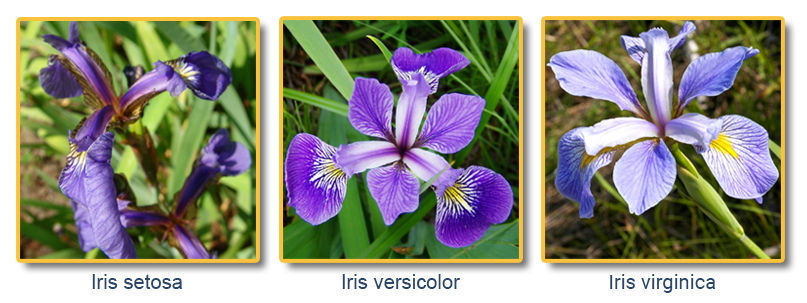

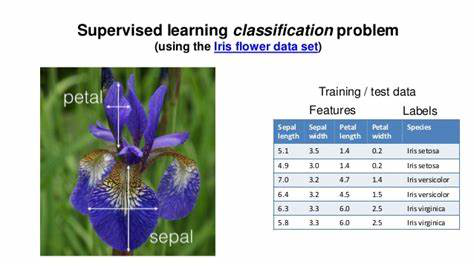

(400, 500)


In [43]:
from PIL import Image
import requests
from io import BytesIO
import urllib.request
url = "https://th.bing.com/th/id/OIP._vxp3WcHYUqgFancInORFQHaEK?pid=ImgDet&rs=1"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.show()
box = (200, 200, 600, 700)
cropped_image = img.crop(box)
cropped_image.save('cropped-image.jpg')

# 400x600 size of the image
print(cropped_image.size) 

**IMPORT LIBRARIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**IMPORT DATASET TO PYTHON ENVIRONMENT**

In [47]:
from google.colab import files
uploaded = files.upload()

Saving iris.xls to iris (2).xls


In [49]:
import io
df = pd.read_excel(io.BytesIO(uploaded['iris.xls']))
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# **EXPLORATORY DATA ANALYSIS**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [52]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [55]:
df.isna().sum().value_counts()

6    2
0    2
7    1
dtype: int64

In [56]:
df.shape

(150, 5)

In [57]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [58]:
df=df.dropna()
df.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [59]:
df.shape

(131, 5)

In [60]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

This dataset having null values in PL,PW,SL,SW. So drop the null values. initially (150,5) dataset. After dropping the  datset will be (131,5).
SL,SW,PL,PW are integer datatype and classification is object type.

DATA VISUALIZATION

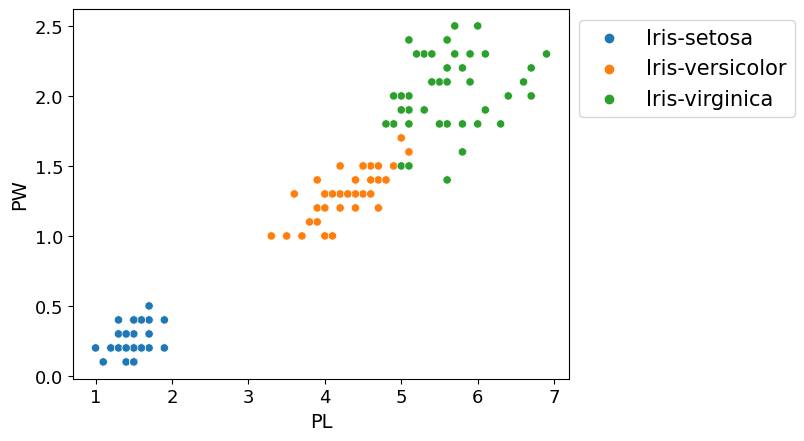

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.scatterplot(x='PL', y='PW',
                hue='Classification', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

From the above plot, we can infer that – 

Species Setosa has smaller petal lengths and widths.
Versicolor Species lies in the middle of the other two species in terms of petal length and width
Species Virginica has the largest of petal lengths and widths.

HISTOGRAM

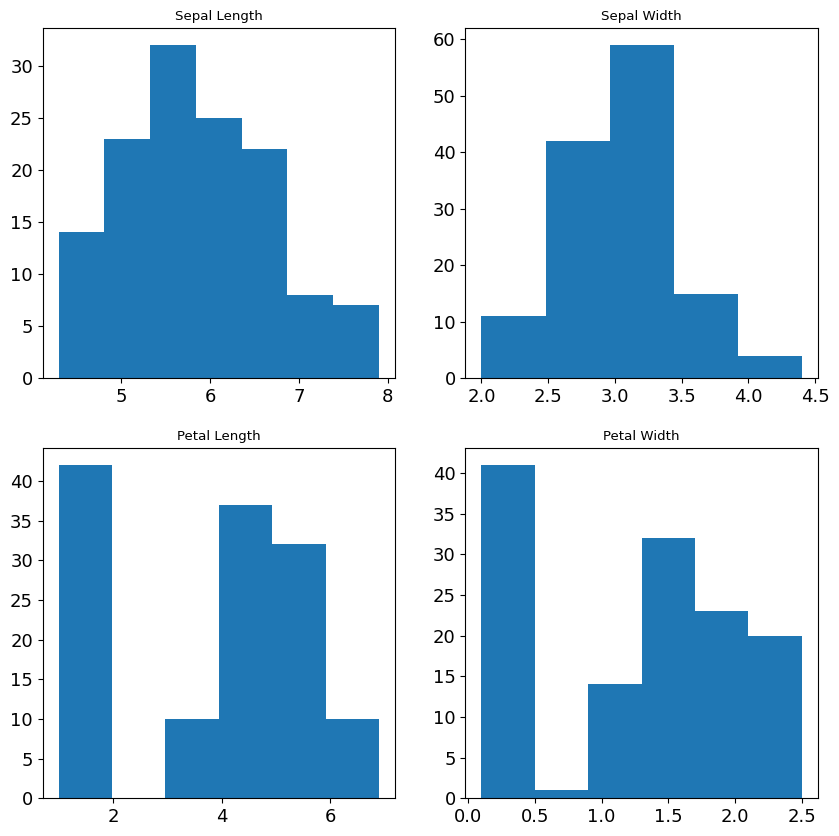

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SL'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SW'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PL'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PW'], bins=6);

From the above plot, we can see that – 

The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
The highest frequency of the petal length is around 50 which is between 1 and 2
The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

## **Histograms with Distplot Plot**
Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

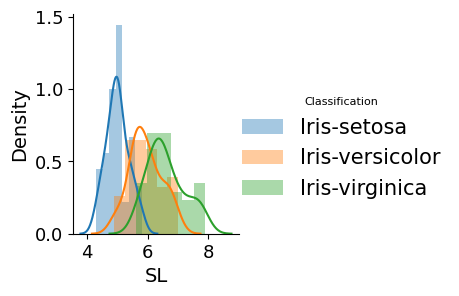

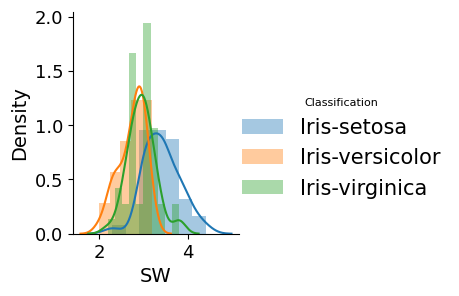

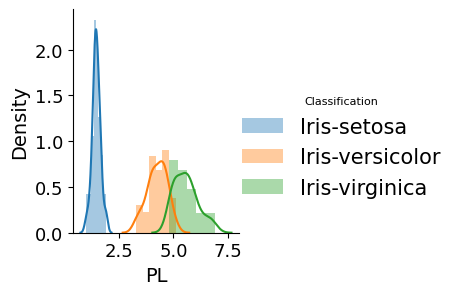

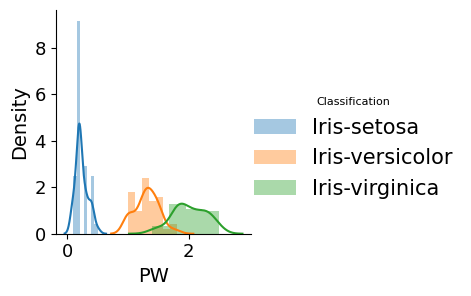

In [70]:
plot = sns.FacetGrid(df, hue="Classification")
plot.map(sns.distplot, "SL").add_legend()
 
plot = sns.FacetGrid(df, hue="Classification")
plot.map(sns.distplot, "SW").add_legend()
 
plot = sns.FacetGrid(df, hue="Classification")
plot.map(sns.distplot, "PL").add_legend()
 
plot = sns.FacetGrid(df, hue="Classification")
plot.map(sns.distplot, "PW").add_legend()
 
plt.show()

From the above plots, we can see that – 

In the case of Sepal Length, there is a huge amount of overlapping.
In the case of Sepal Width also, there is a huge amount of overlapping.
In the case of Petal Length, there is a very little amount of overlapping.
In the case of Petal Width also, there is a very little amount of overlapping.
So we can use Petal Length and Petal Width as the classification feature

**BOX PLOTS**

Box Plots We can use boxplots to see how the categorical value os distributed with other numerical values 

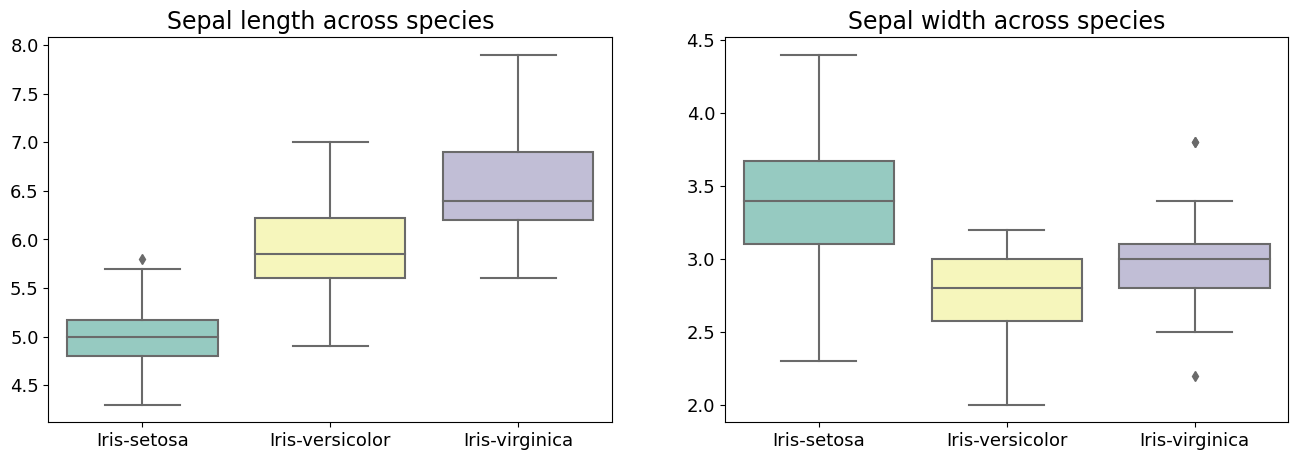

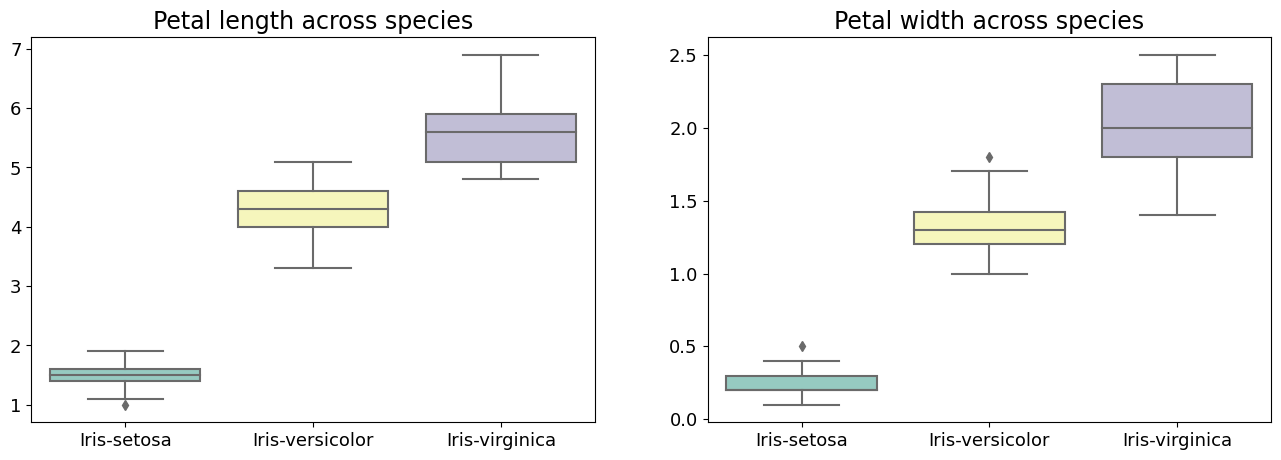

In [61]:
params = {'legend.fontsize': 9
          , 'font.size': 16
          , 'font.serif': ['Computer Modern Roman']
          , 'axes.labelsize': 16
          , 'xtick.labelsize': 17
          }
# comparison between 3 categories for each numerical variable
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))

ax = sns.boxplot(x="Classification", y="SL",data=df, palette="Set3", ax = ax1).set_title("Sepal length across species",fontsize=17)
ax = sns.boxplot(x="Classification", y="SW",data=df, palette="Set3", ax = ax2).set_title("Sepal width across species",fontsize=17)

ax1.set_ylabel('')
ax1.set_xlabel('')

ax2.set_ylabel('')
ax2.set_xlabel('')

# Turn off tick labels
#ax1.set_yticklabels([])
#ax1.set_xticklabels([])

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))

ax = sns.boxplot(x="Classification", y="PL",data=df, palette="Set3", ax = ax1).set_title("Petal length across species",fontsize=17)
ax = sns.boxplot(x="Classification", y="PW",data=df, palette="Set3", ax = ax2).set_title("Petal width across species",fontsize=17)

ax1.set_ylabel('')
ax1.set_xlabel('')

ax2.set_ylabel('')
ax2.set_xlabel('')

plt.show()

From the above graph, we can see that – 

Species Setosa has the smallest features and less distributed with some outliers.
Species Versicolor has the average features.
Species Virginica has the highest features


## Pandas dataframe.corr() is used to find the pairwise **correlation** of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [73]:
df.corr(method='pearson')

<ipython-input-73-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,SL,SW,PL,PW
SL,1.000000,-0.116294,0.872310,0.813370
SW,-0.116294,1.000000,-0.421222,-0.359783
PL,0.872310,-0.421222,1.000000,0.961647
PW,0.813370,-0.359783,0.961647,1.000000


# **The heatmap**
 is a data visualization technique that is used to analyze the dataset as colors in two dimensions. Basically, it shows a correlation between all numerical variables in the dataset. In simpler terms, we can plot the above-found correlation using the heatmaps.

<ipython-input-76-8900ca6cfa24>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr(method='pearson')


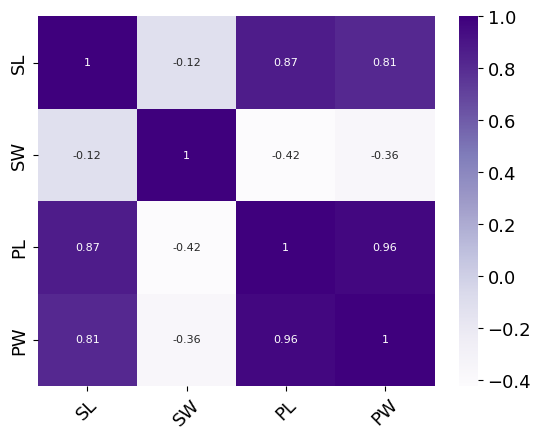

In [76]:
params = {'legend.fontsize': 15
          , 'font.size': 8
          , 'font.serif': ['Computer Modern Roman']
          , 'axes.labelsize': 14
          , 'xtick.labelsize': 13
          , 'ytick.labelsize': 13
         }

plt.rcParams.update(params)
corrMatrix = df.corr(method='pearson')
# heatmap of Correlation can help to identify the most correlated variables.
# look for values close to +1 and -1

sns.heatmap(corrMatrix, annot=True, cmap="Purples")
plt.xticks(rotation=45)
plt.show()

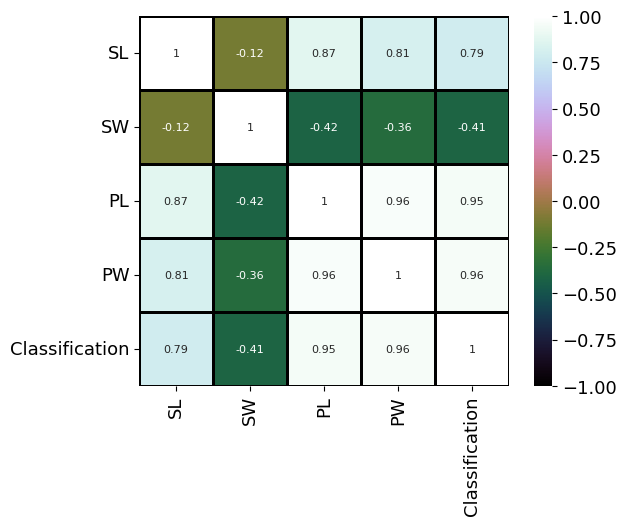

In [190]:
ig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)


From the above graph, we can see that –

Petal width and petal length have high correlations. 
Petal length and sepal width have good correlations.
Petal Width and Sepal length have good correlations.

# **HANDLING OUTLIERS**

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s dataframe.

<Axes: xlabel='SW'>

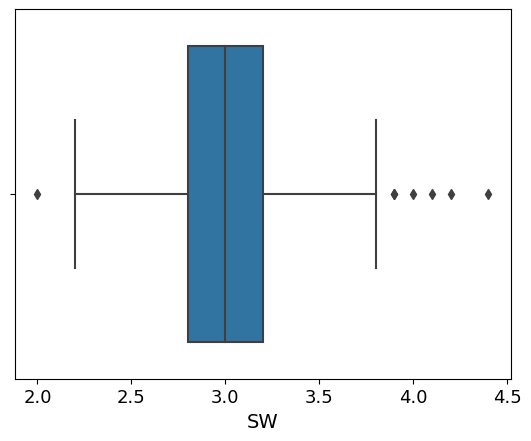

In [17]:
sns.boxplot(x='SW', data=df)

In the above graph, the values above 4 and below 2 are acting as outliers.

# **Removing Outliers**
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [92]:
# Importing
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import io
df = pd.read_excel(io.BytesIO(uploaded['iris.xls']))
upper_limit = df['SW'].quantile(0.75)
lower_limit = df['SW'].quantile(0.25)
print(upper_limit)
print(lower_limit)


3.3
2.8


<Axes: xlabel='SW'>

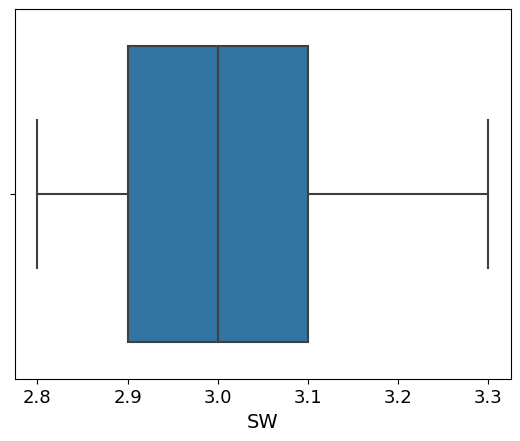

In [97]:
new_df = df[(df['SW'] <= 3.3) & (df['SW'] >= 2.8)]
sns.boxplot(x='SW', data=new_df)

# **LABEL ENCODING**

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


Split the Data Into Train and Test Datasets

In [193]:
from sklearn import neighbors
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
df=df.dropna()
x = df.drop('Classification', axis=1)
y = df['Classification']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)
x_train.shape
print('x_train.shape')
print(x_train.shape)
x_test.shape
print('x_test.shape')
print(x_test.shape)
y_train.shape
print('y_train.shape')
print(y_train.shape)
y_test.shape
print('y_test.shape')
print(y_test.shape)

x_train.shape
(98, 4)
x_test.shape
(33, 4)
y_train.shape
(98,)
y_test.shape
(33,)


# **Create the Model (Classification)**

# **#Logistic Regression**

In [194]:
#Linear Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
logistic_predictions = logistic_regression.predict(x_test)
print('Accuracy with Logistic Regression is %.2f' % (accuracy_score(y_test,  logistic_predictions) * 100))

Accuracy with Logistic Regression is 96.97


In [200]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,logistic_predictions)

array([[12,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]])

In [147]:
accuracy=accuracy_score(y_test,logistic_predictions)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 96.97


In [181]:
expected = y
predicted = logistic_regression.predict(x_test)
predicted

array([1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0])

# **#KNeighborsClassifier**

In [148]:
#KNeighborsClassifier

k_classifier = neighbors.KNeighborsClassifier()
k_classifier.fit(x_train, y_train)
k_neighbors_predictions = k_classifier.predict(x_test)
print('Accuracy with KNeighborsClassifier is %.2f' % (accuracy_score(y_test,  k_neighbors_predictions) * 100))

Accuracy with KNeighborsClassifier is 96.97


# **#DecisionTreeClassifier**

In [149]:
#DecisionTreeClassifier

decision_classifier = tree.DecisionTreeClassifier()
decision_classifier.fit(x_train, y_train)
decision_classifier_predictions = decision_classifier.predict(x_test)
print('Accuracy with DecisionTreeClassifier is %.2f' % (accuracy_score(y_test,  decision_classifier_predictions) * 100))

Accuracy with DecisionTreeClassifier is 96.97


** Compare the predictions with its accuracy score you can optionally create a DataFrame with ML Algorithm used, Predictions for each algorithm and its accuracy score.**

In [150]:
result_data = [logistic_predictions, k_neighbors_predictions, decision_classifier_predictions]
result_predictions = [(accuracy_score(y_test, logistic_predictions) * 100),
 (accuracy_score(y_test, k_neighbors_predictions) * 100),
 (accuracy_score(y_test, decision_classifier_predictions) * 100)]
data_frame = pd.DataFrame([result_data, result_predictions],
columns=['Logistic Regression', 'KNeighborsClassification', 'DecisionTreeClassification'])
data_frame = data_frame.T
data_frame.columns = ['Predictions', 'Accuracy']
data_frame

,Predictions,Accuracy
Logistic Regression,"[1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, ...",96.969697
KNeighborsClassification,"[1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, ...",96.969697
DecisionTreeClassification,"[1, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, ...",96.969697


# **From this we can understand that these three having same accuracy.**


Knn model with specific K

In [151]:
X = df.drop(['Classification'], axis=1)
y = df['Classification']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(131, 4)
(131,)


Train and test on the same dataset
This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
There is also a risk of overfitting the training data.

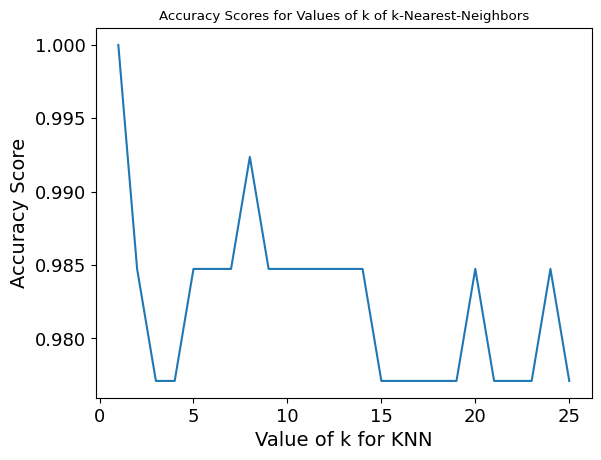

In [152]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [153]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))


0.9770992366412213


Split the dataset into a training set and a testing set
Advantages
By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
This ensures that we won't use the same observations in both sets.
More flexible and faster than creating a model using all of the dataset for training.
Disadvantages¶
The accuracy scores for the testing set can vary depending on what observations are in the set.
This disadvantage can be countered using k-fold cross-validation.
Notes
The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
If a model is too complex or not complex enough, the testing accuracy is lower.
For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(78, 4)
(78,)
(53, 4)
(53,)


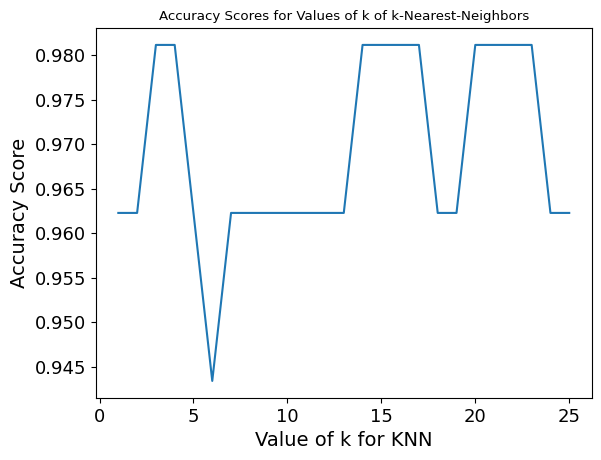

In [155]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [156]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9622641509433962


# **CHECKING PREDICTIONS**

In [167]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[5, 3, 4, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

# **SVC model**

In [176]:
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# SVC with linear kernel
# for SVC, may be impractical beyond tens of thousands of samples
linear_svc = SVC(kernel='linear').fit(X_train, y_train)
svclinear_prediction=linear_svc.predict(X_test)
print('The accuracy of the linear SVC is',"{:.3f}".format(metrics.accuracy_score(svclinear_prediction,y_test)))

The accuracy of the linear SVC is 1.000


In [177]:
# SVC with polynomial kernel
poly_svc = SVC(kernel='poly', degree = 4).fit(X_train, y_train)
svcpoly_prediction=poly_svc.predict(X_test)
print('The accuracy of the Poly SVC is',"{:.3f}".format(metrics.accuracy_score(svcpoly_prediction,y_test)))

The accuracy of the Poly SVC is 0.981


In [178]:
# Logistic regression
mod_lr = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
log_prediction=mod_lr.predict(X_test)
print('The accuracy of the Logistic Regression is',"{:.3f}".format(metrics.accuracy_score(log_prediction,y_test)))

The accuracy of the Logistic Regression is 0.981


In [179]:
# Model development
train, test = train_test_split(df, test_size = 0.4, stratify = df['Classification'], random_state = 42)
X_train = train[['SL','SW','PL','PW']]
y_train = train.Classification
X_test = test[['SL','SW','PL','PW']]
y_test = test.Classification
# first try decision tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
model_prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(model_prediction,y_test)))

The accuracy of the Decision Tree is 0.943


In [180]:
result_data = [log_prediction, svclinear_prediction, model_prediction, svcpoly_prediction]
result_predictions = [(accuracy_score(y_test, log_prediction) * 100),
 (accuracy_score(y_test, svclinear_prediction) * 100),
 (accuracy_score(y_test, svcpoly_prediction) * 100), accuracy_score(y_test,model_prediction)]
data_frame = pd.DataFrame([result_data, result_predictions],
columns=['log_prediction', 'svclinear_prediction', 'model_prediction', 'svcpoly_prediction'])
data_frame = data_frame.T
data_frame.columns = ['Predictions', 'Accuracy']
data_frame

,Predictions,Accuracy
log_prediction,"[0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, ...",98.113208
svclinear_prediction,"[0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, ...",100.0
model_prediction,"[0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, ...",98.113208
svcpoly_prediction,"[0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, ...",0.943396


# **From this we concluded that linear regression model having 100% accuracy**